Name: Muley, Tushar

Title: DSC550 Term Project

Date: May 23, 2021 Milestone 4 <--Active

# Exercise 9-2 Week 9 & 10 Milestone 4

Rerun the model using the correct model. Liner regression would not work since this is a classifer. Below reran with classifier model.

For this Milestone I ran a few different Classification models to see how they would do. I ran a KNN Classifier and Decision Tree Classifier Model. I was able to produce a few plots related to each classifier model.

After seeing the accuracy results I believe the data might be more skewed toward low-risk individuals and not having enough of balance. I have found away to balance the Target variable to possibly solve this issue. I would imagine in the real world I would have to find better data by month or year to help build my model.


In [90]:
#Import pycaret classification library
from pycaret.classification import * 

In [123]:
df_credit

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,TARGET,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,EDUCATION_TYPE_Academic degree,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,AGE_OF_APP,TIME_EMPLOYED,SEX_F,SEX_M,HOUSING_TYPE_Free,HOUSING_TYPE_Own,HOUSING_TYPE_Rent
0,5065438,1,0,270000.0,0,0,1,0,0,0,0,0,0,0,1,36,6.39,1,0,1,0,0
1,5142753,0,0,81000.0,0,0,0,0,1,0,0,0,0,0,1,49,1.05,1,0,0,1,0
2,5111146,1,1,270000.0,0,0,1,0,0,0,0,1,0,0,0,54,2.86,0,1,0,1,0
3,5010310,1,1,112500.0,0,0,1,0,0,0,0,0,0,0,1,41,5.43,1,0,0,1,0
4,5010835,1,1,139500.0,0,0,1,0,0,0,0,0,0,0,1,48,15.49,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,1,0,166500.0,0,0,1,0,0,0,0,0,0,0,1,34,15.00,0,1,1,0,0
537663,5010773,0,1,135000.0,0,0,1,0,0,0,0,1,0,0,0,39,12.88,1,0,1,0,0
537664,5105601,0,1,180000.0,0,0,1,0,0,0,0,1,0,0,0,67,6.84,0,1,0,1,0
537665,5132833,1,0,220500.0,0,0,1,0,0,0,0,0,0,0,1,62,10.69,0,1,0,1,0


In [125]:
#Set classifier defaults and setting the random seed as 40
clf = setup(df_credit, target='TARGET', session_id=40)

,Description,Value
0,session_id,40
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(537667, 22)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [126]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9969,0.9388,0.3007,0.6691,0.4123,0.4110,0.4455,1.5840
rf,Random Forest Classifier,0.9969,0.9402,0.3167,0.6616,0.4264,0.4250,0.4552,30.1720
et,Extra Trees Classifier,0.9969,0.9388,0.3007,0.6691,0.4123,0.4110,0.4455,20.0370
xgboost,Extreme Gradient Boosting,0.9969,0.9610,0.2673,0.7250,0.3888,0.3876,0.4378,29.8100
knn,K Neighbors Classifier,0.9967,0.8434,0.3646,0.5730,0.4446,0.4431,0.4550,16.4030
gbc,Gradient Boosting Classifier,0.9964,0.8131,0.1315,0.5332,0.2084,0.2072,0.2611,34.8170
lr,Logistic Regression,0.9963,0.4333,0.0000,0.0000,0.0000,0.0000,0.0000,1.8780
svm,SVM - Linear Kernel,0.9963,0.0000,0.0000,0.0000,0.0000,-0.0001,-0.0001,27.0310
ridge,Ridge Classifier,0.9963,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3010
ada,Ada Boost Classifier,0.9963,0.7883,0.0015,0.0444,0.0028,0.0027,0.0075,14.8750


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [127]:
#Run another session with random set to 100
clf = setup(df_credit, target='TARGET', session_id=100)

,Description,Value
0,session_id,100
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(537667, 22)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [128]:
#After running 100 random seeds
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9969,0.9613,0.2547,0.7329,0.3772,0.3760,0.4304,28.5840
dt,Decision Tree Classifier,0.9968,0.9311,0.2849,0.6498,0.3948,0.3934,0.4281,1.2260
rf,Random Forest Classifier,0.9968,0.9321,0.2993,0.6361,0.4058,0.4044,0.4342,22.4890
et,Extra Trees Classifier,0.9968,0.9311,0.2849,0.6498,0.3948,0.3934,0.4281,20.3780
knn,K Neighbors Classifier,0.9966,0.8449,0.3504,0.5684,0.4321,0.4305,0.4439,9.9210
gbc,Gradient Boosting Classifier,0.9964,0.8179,0.1446,0.5752,0.2291,0.2280,0.2853,30.3960
lr,Logistic Regression,0.9963,0.4334,0.0000,0.0000,0.0000,0.0000,0.0000,1.6670
svm,SVM - Linear Kernel,0.9963,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23.3720
ridge,Ridge Classifier,0.9963,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3010
ada,Ada Boost Classifier,0.9963,0.7947,0.0000,0.0000,0.0000,-0.0001,-0.0003,9.9910


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [129]:
#Run a specfici model
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9969,0.9627,0.2230,0.7750,0.3464,0.3453,0.4147
1,0.9969,0.9668,0.2734,0.7170,0.3958,0.3946,0.4416
2,0.9968,0.9497,0.2446,0.6800,0.3598,0.3585,0.4066
3,0.9970,0.9614,0.2662,0.7872,0.3978,0.3967,0.4567
4,0.9967,0.9621,0.2734,0.6333,0.3819,0.3805,0.4148
5,0.9968,0.9676,0.2230,0.6889,0.3370,0.3358,0.3908
6,0.9969,0.9546,0.2590,0.7059,0.3789,0.3777,0.4264
7,0.9969,0.9529,0.2446,0.7234,0.3656,0.3644,0.4195
8,0.9972,0.9748,0.2734,0.8636,0.4153,0.4143,0.4850
9,0.9970,0.9602,0.2662,0.7551,0.3936,0.3924,0.4473


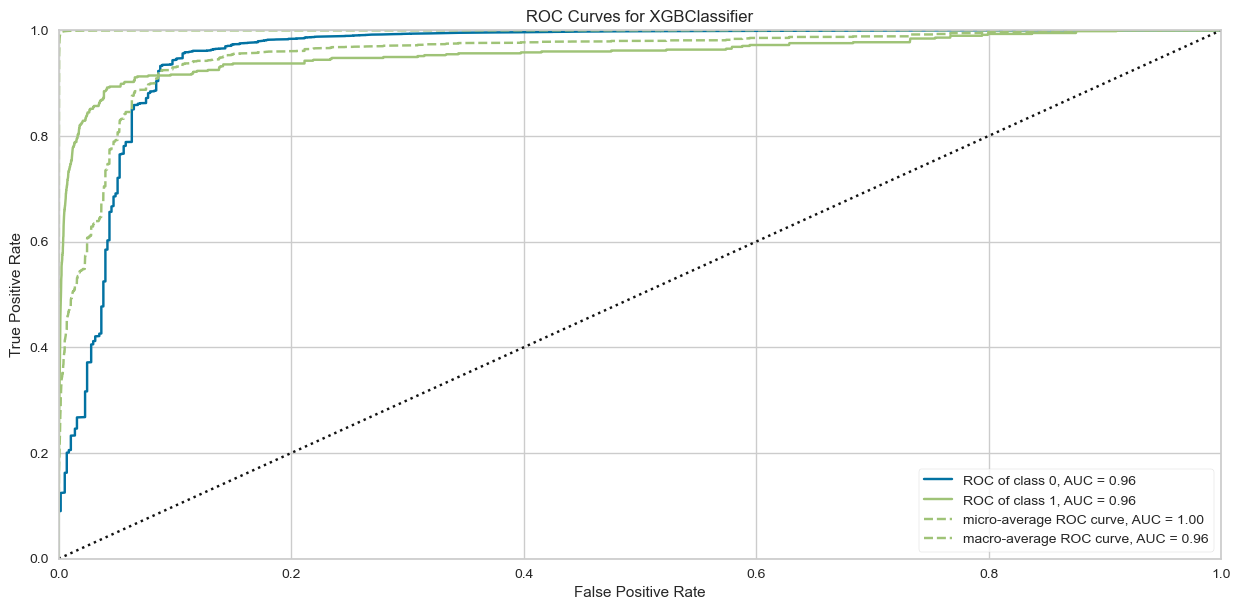

In [130]:
#Plot ROC Curves
plot_model(model)

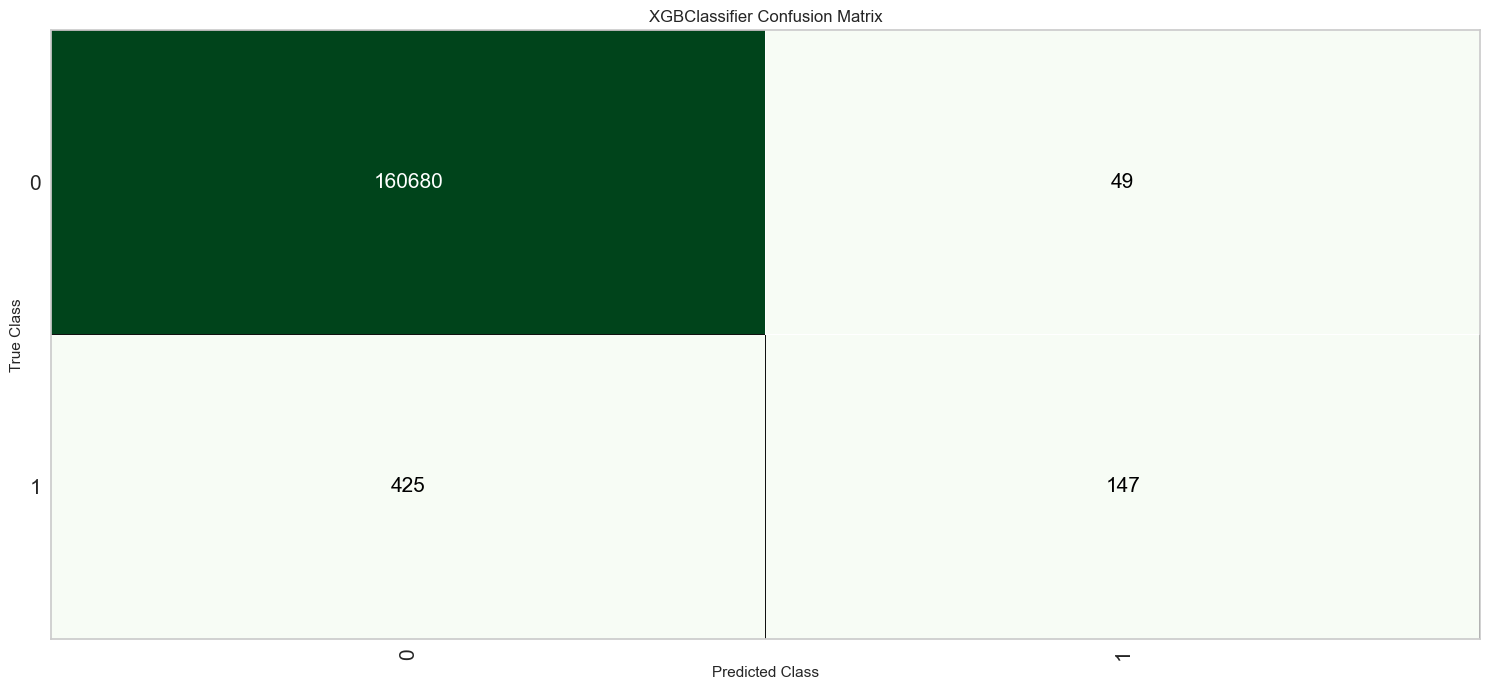

In [131]:
#Confusion Matrix with 30% of the data
plot_model(model, 'confusion_matrix')

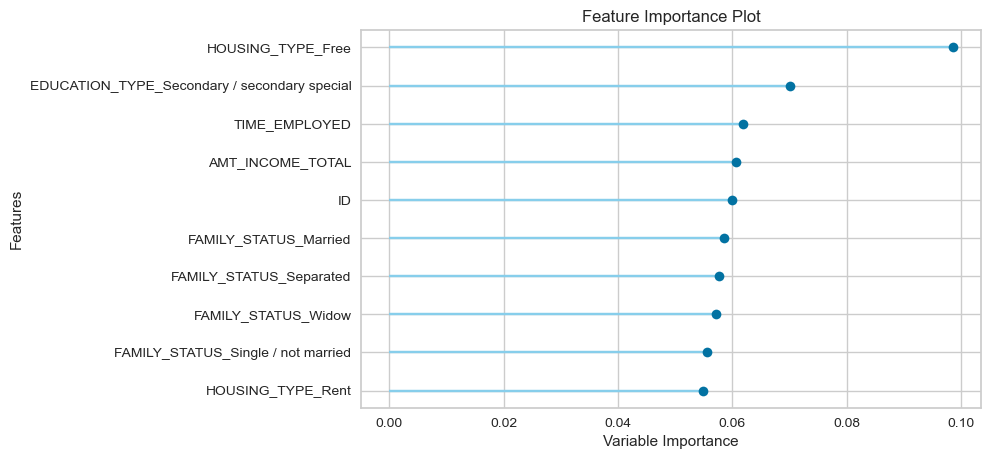

In [132]:
#Plot the important Features
plot_model(model, plot='feature')

In [133]:
#Preview the data
df_credit

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,TARGET,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,...,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,AGE_OF_APP,TIME_EMPLOYED,SEX_F,SEX_M,HOUSING_TYPE_Free,HOUSING_TYPE_Own,HOUSING_TYPE_Rent
0,5065438,1,0,270000.0,0,0,1,0,0,0,...,0,0,1,36,6.39,1,0,1,0,0
1,5142753,0,0,81000.0,0,0,0,0,1,0,...,0,0,1,49,1.05,1,0,0,1,0
2,5111146,1,1,270000.0,0,0,1,0,0,0,...,0,0,0,54,2.86,0,1,0,1,0
3,5010310,1,1,112500.0,0,0,1,0,0,0,...,0,0,1,41,5.43,1,0,0,1,0
4,5010835,1,1,139500.0,0,0,1,0,0,0,...,0,0,1,48,15.49,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,1,0,166500.0,0,0,1,0,0,0,...,0,0,1,34,15.00,0,1,1,0,0
537663,5010773,0,1,135000.0,0,0,1,0,0,0,...,0,0,0,39,12.88,1,0,1,0,0
537664,5105601,0,1,180000.0,0,0,1,0,0,0,...,0,0,0,67,6.84,0,1,0,1,0
537665,5132833,1,0,220500.0,0,0,1,0,0,0,...,0,0,1,62,10.69,0,1,0,1,0


Note: Based on the above Feature importance. The ID field should play NO part in the. I am remove it as it influenced the model to a large extent. My mistake for not remove it. 

In [85]:
#Review the columns
df_credit.columns

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'TARGET',
       'FAMILY_STATUS_Civil marriage', 'FAMILY_STATUS_Married',
       'FAMILY_STATUS_Separated', 'FAMILY_STATUS_Single / not married',
       'FAMILY_STATUS_Widow', 'EDUCATION_TYPE_Academic degree',
       'EDUCATION_TYPE_Higher education', 'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'AGE_OF_APP',
       'TIME_EMPLOYED', 'SEX_F', 'SEX_M', 'HOUSING_TYPE_Free',
       'HOUSING_TYPE_Own', 'HOUSING_TYPE_Rent'],
      dtype='object')

In [86]:
#Make a copy before droping
df_credit_copy_4 = df_credit.copy(deep=True)

In [ ]:
#Drop the ID field
df_credit=df_credit.drop(["ID"], axis=1)

In [88]:
#Preview
df_credit

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,TARGET,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,EDUCATION_TYPE_Academic degree,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,AGE_OF_APP,TIME_EMPLOYED,SEX_F,SEX_M,HOUSING_TYPE_Free,HOUSING_TYPE_Own,HOUSING_TYPE_Rent
0,1,0,270000.0,0,0,1,0,0,0,0,0,0,0,1,36,6.39,1,0,1,0,0
1,0,0,81000.0,0,0,0,0,1,0,0,0,0,0,1,49,1.05,1,0,0,1,0
2,1,1,270000.0,0,0,1,0,0,0,0,1,0,0,0,54,2.86,0,1,0,1,0
3,1,1,112500.0,0,0,1,0,0,0,0,0,0,0,1,41,5.43,1,0,0,1,0
4,1,1,139500.0,0,0,1,0,0,0,0,0,0,0,1,48,15.49,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,1,0,166500.0,0,0,1,0,0,0,0,0,0,0,1,34,15.00,0,1,1,0,0
537663,0,1,135000.0,0,0,1,0,0,0,0,1,0,0,0,39,12.88,1,0,1,0,0
537664,0,1,180000.0,0,0,1,0,0,0,0,1,0,0,0,67,6.84,0,1,0,1,0
537665,1,0,220500.0,0,0,1,0,0,0,0,0,0,0,1,62,10.69,0,1,0,1,0


In [92]:
#Run another session with random set to 100
clf_100 = setup(df_credit, target='TARGET', session_id=100)

,Description,Value
0,session_id,100
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(537667, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [93]:
#After running 100 random seeds
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9967,0.9575,0.1576,0.7393,0.2594,0.2584,0.3399,1.2960
rf,Random Forest Classifier,0.9967,0.9574,0.1612,0.7310,0.2637,0.2627,0.3418,22.6350
et,Extra Trees Classifier,0.9967,0.9575,0.1576,0.7393,0.2594,0.2584,0.3399,19.4620
xgboost,Extreme Gradient Boosting,0.9967,0.9555,0.1518,0.7598,0.2525,0.2516,0.3381,27.3830
knn,K Neighbors Classifier,0.9964,0.7921,0.2058,0.5381,0.2940,0.2925,0.3286,22.5540
lr,Logistic Regression,0.9963,0.4747,0.0000,0.0000,0.0000,0.0000,0.0000,2.9150
svm,SVM - Linear Kernel,0.9963,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.6680
ridge,Ridge Classifier,0.9963,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3180
ada,Ada Boost Classifier,0.9963,0.7787,0.0000,0.0000,0.0000,-0.0001,-0.0002,10.0490
gbc,Gradient Boosting Classifier,0.9963,0.8472,0.0511,0.5897,0.0908,0.0902,0.1634,30.6450


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Note: After removing the ID field the best model changed. Based off this I am selecting to use KNN as that yeilds a better F1 score with a "balanced" recall and precision score of 0.2058 and 0.5381.

In [95]:
#Run a specfici model for testing.
knn_model = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9964,0.8552,0.2518,0.5224,0.3398,0.3382,0.3611
1,0.9954,0.7517,0.1942,0.3103,0.2389,0.2368,0.2433
2,0.9965,0.7916,0.2086,0.5800,0.3069,0.3055,0.3465
3,0.9963,0.7442,0.2086,0.4833,0.2915,0.2899,0.3160
4,0.9968,0.8304,0.2230,0.7045,0.3388,0.3376,0.3953
5,0.9963,0.7799,0.1942,0.5094,0.2812,0.2798,0.3131
6,0.9965,0.7729,0.2446,0.5574,0.3400,0.3385,0.3678
7,0.9963,0.7551,0.1439,0.5000,0.2235,0.2222,0.2669
8,0.9964,0.8341,0.2230,0.5167,0.3116,0.3100,0.3379
9,0.9967,0.8057,0.1655,0.6970,0.2674,0.2664,0.3386


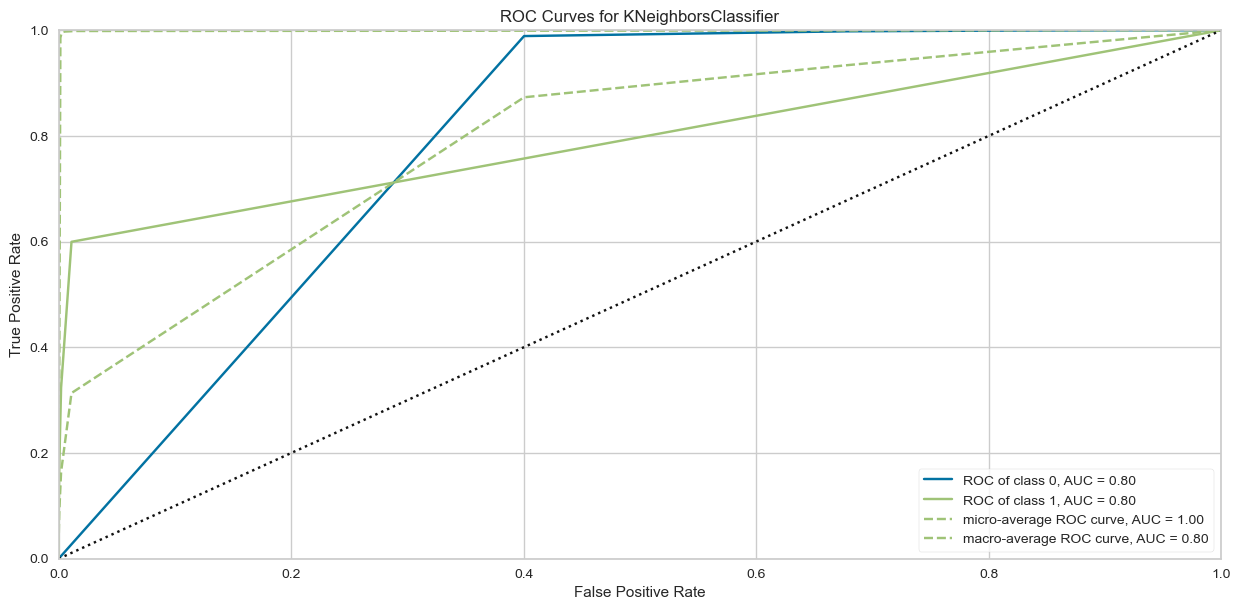

In [143]:
#Plot the knn model using Area under the curve plot
plot_model(knn_model)

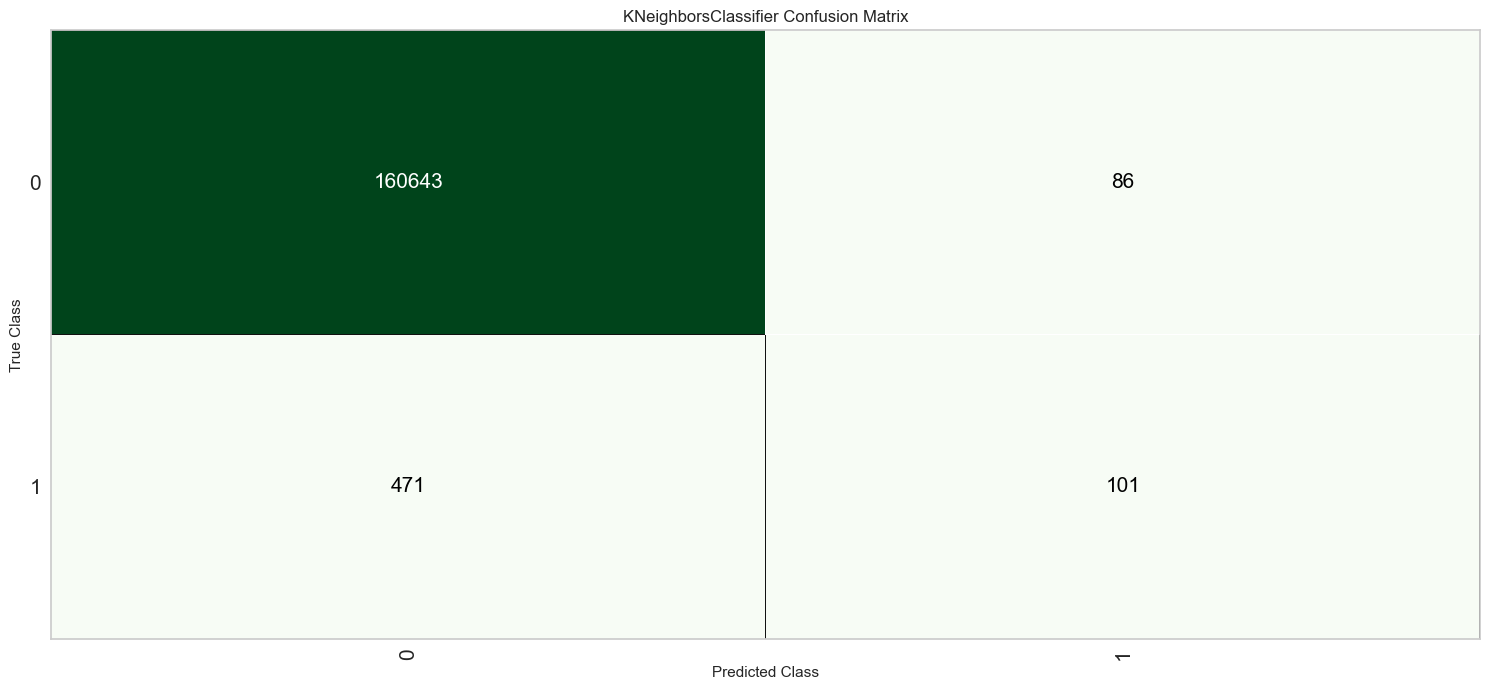

In [144]:
#Confusion Matrix with 30% of the data
#Zero (0) is less risky vs one (1) is high risk
plot_model(knn_model, 'confusion_matrix')

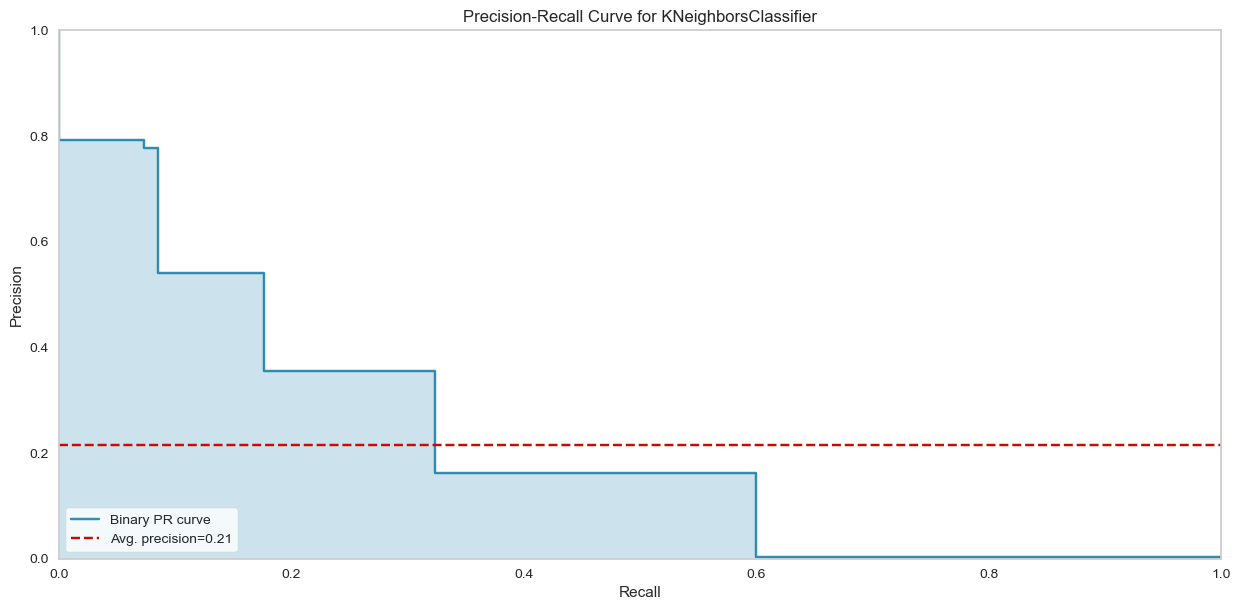

In [96]:
#Plot the important Features Precision Recall Curve
plot_model(knn_model, plot='pr')

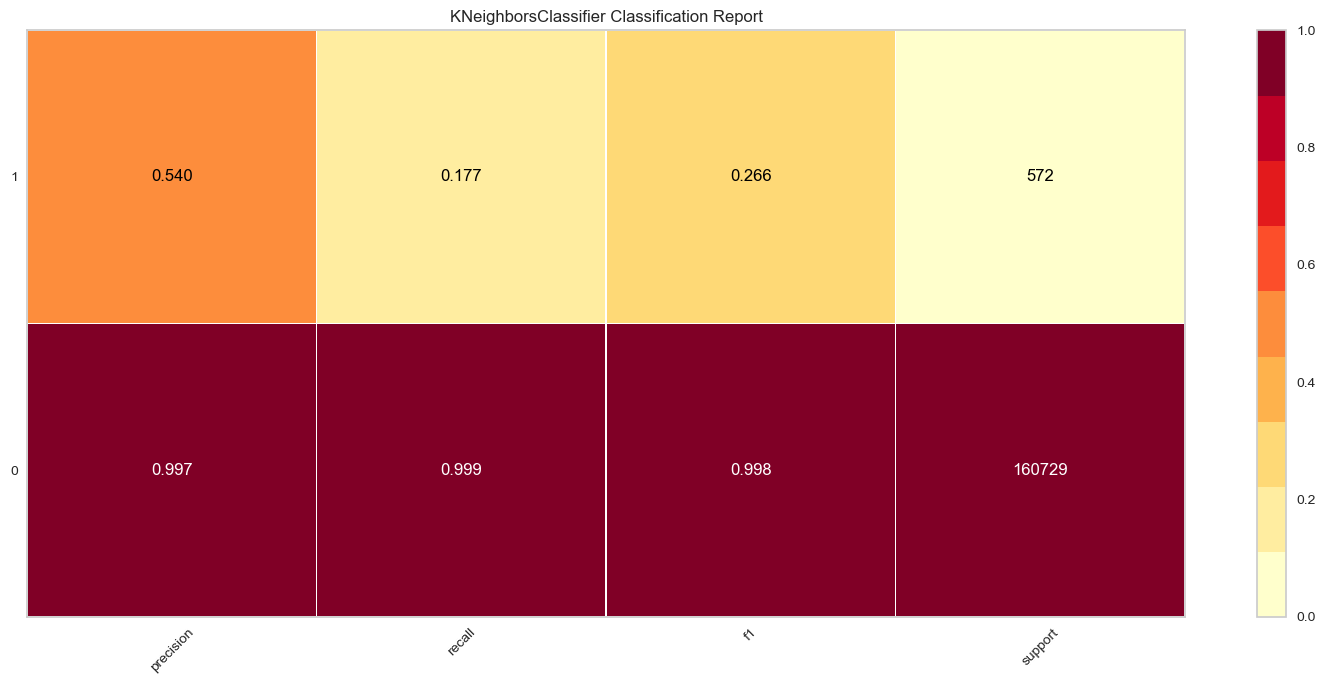

In [97]:
#Plot the KNN Classification Report
#Zero (0) is less risky vs one (1) is high risk
plot_model(knn_model, plot='class_report')


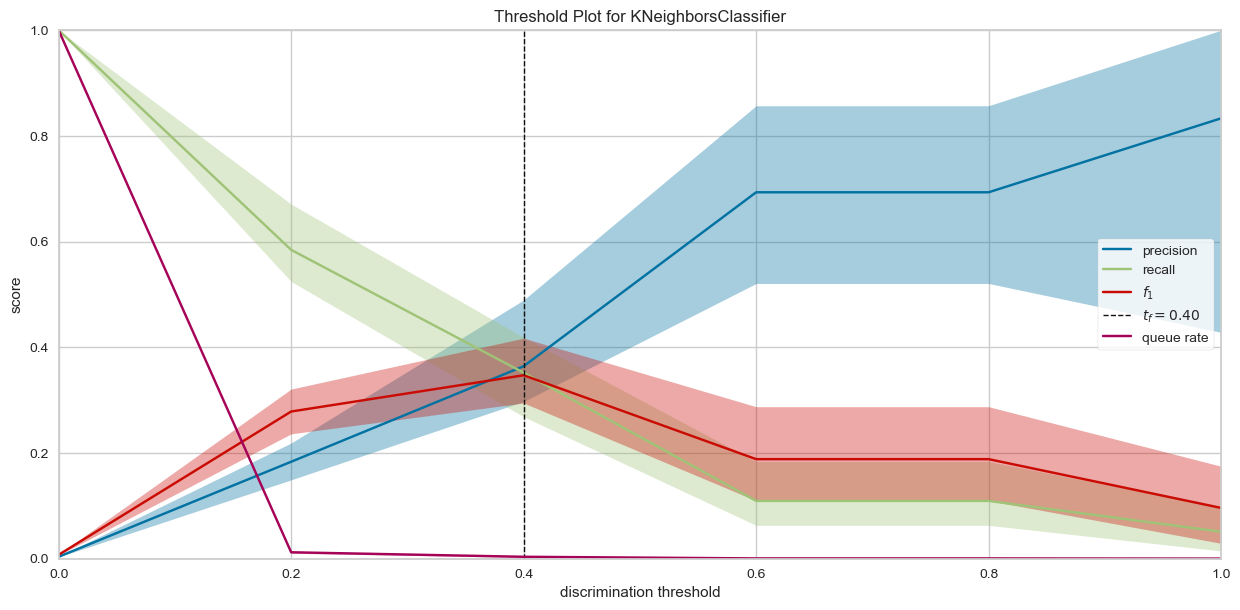

In [99]:
#Plot the KNN Discrimination Threshold
plot_model(knn_model, plot='threshold')

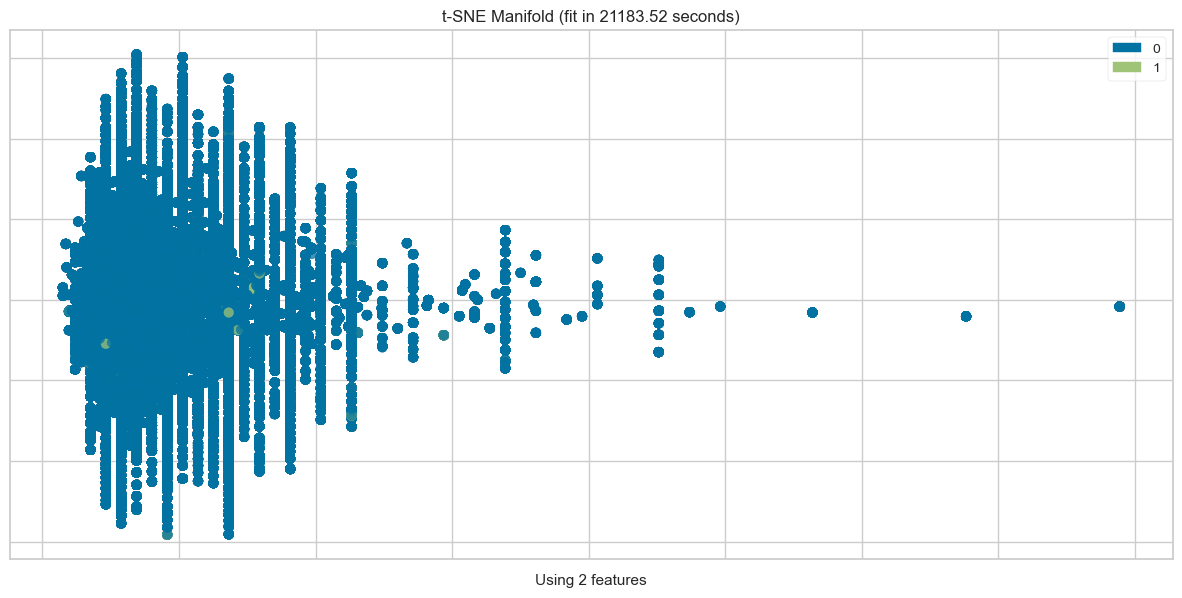

In [100]:
#Plot Manifold Learning
#Zero (0) is less risky vs one (1) is high risk
plot_model(knn_model, plot='manifold')

In [101]:
#New model
#Run a decision tree model for testing.

dt_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9968,0.9627,0.1655,0.8214,0.2754,0.2746,0.3678
1,0.9966,0.9596,0.1439,0.6897,0.2381,0.2371,0.3140
2,0.9967,0.9459,0.1799,0.7353,0.2890,0.2880,0.3627
3,0.9967,0.9471,0.1799,0.7143,0.2874,0.2863,0.3574
4,0.9967,0.9484,0.1583,0.7097,0.2588,0.2578,0.3342
5,0.9965,0.9587,0.1295,0.6429,0.2156,0.2146,0.2875
6,0.9969,0.9520,0.1871,0.8387,0.3059,0.3049,0.3952
7,0.9964,0.9587,0.1151,0.5517,0.1905,0.1894,0.2509
8,0.9969,0.9816,0.1727,0.8889,0.2892,0.2883,0.3910
9,0.9967,0.9599,0.1439,0.8000,0.2439,0.2431,0.3384


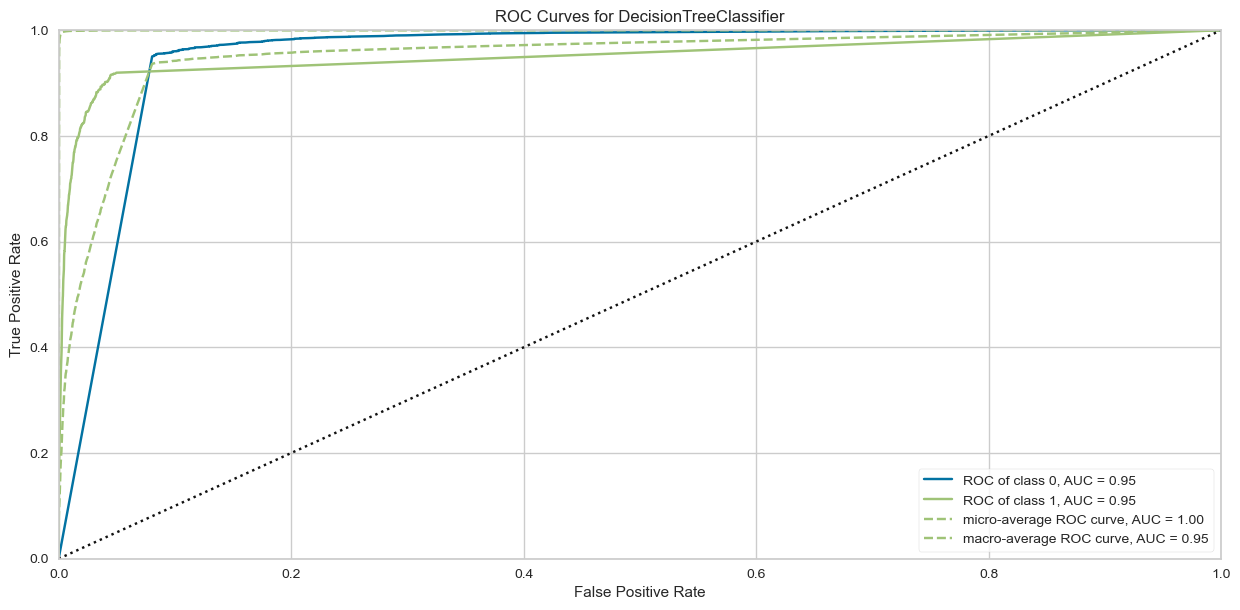

In [102]:
#Plot Area under the Curve plot the Decision Tree model
plot_model(dt_model)

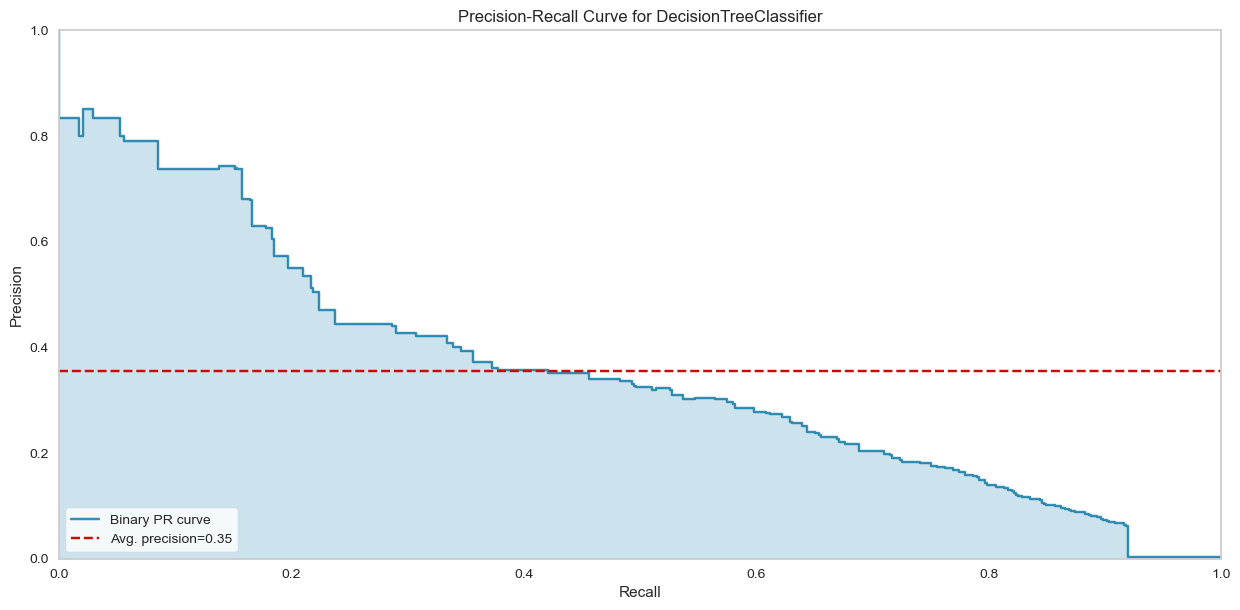

In [103]:
#Plot the important Features Precision Recall Curve
plot_model(dt_model, plot='pr')

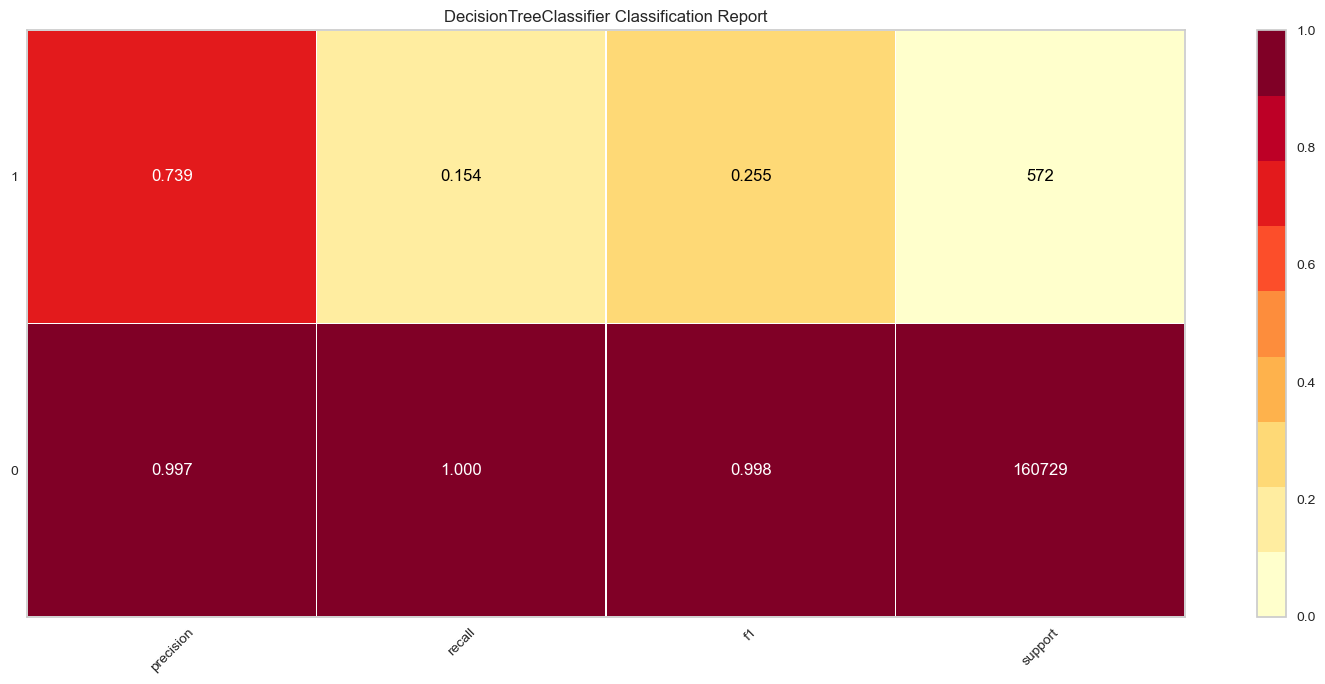

In [105]:
#Plot the Classification Report for Decision Tree
#Zero (0) is less risky vs one (1) is high risk
plot_model(dt_model, plot='class_report')

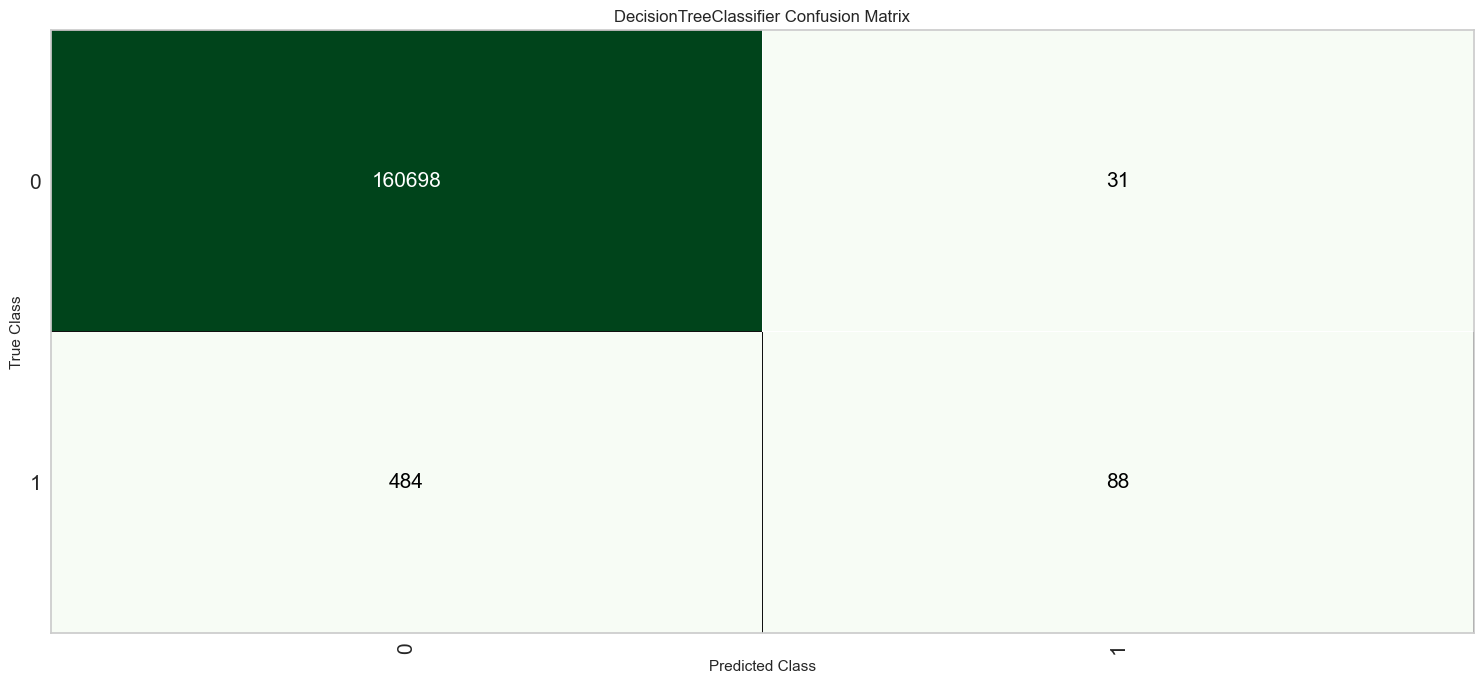

In [104]:
#Confusion Matrix with dession tree classification model
Zero (0) is less risky vs one (1) is high risk
plot_model(dt_model, 'confusion_matrix')

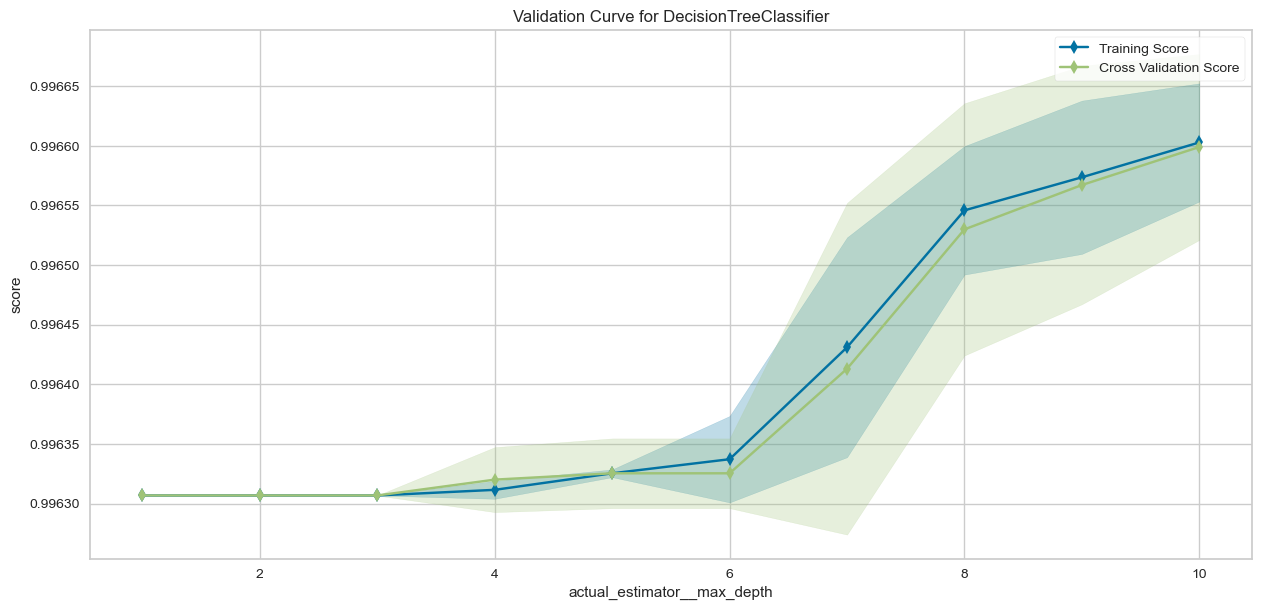

In [106]:
#Validation Curve plot using the Decision Tree Model
plot_model(dt_model, 'vc')

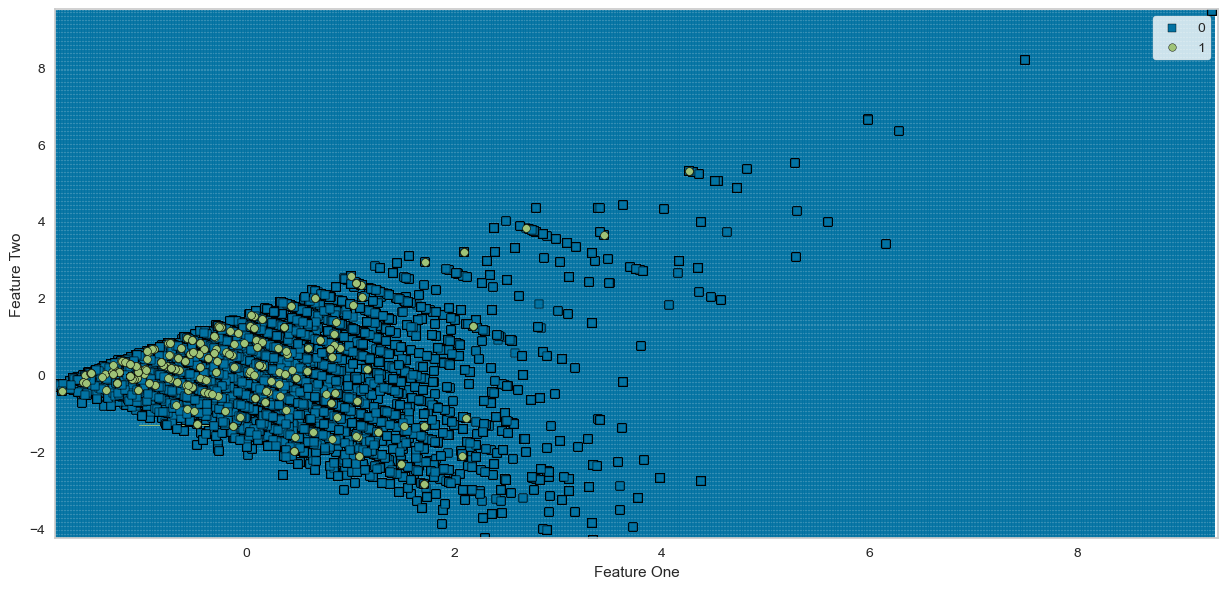

In [107]:
#Decision Boundary plot using the Decision Tree Model
plot_model(dt_model, 'boundary')



#Doing a balancing of the data to since I am suspecting we have imbalance of low-risk vis high risk individuals. This process allows Pycaret to balance the data in the target. Some of the results look a lot better.

In [109]:
#See if we can fix oms of the imbalance in the data.
bal_data_100 = setup(df_credit, target='TARGET', fix_imbalance = True)



,Description,Value
0,session_id,7833
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(537667, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [110]:
#Fix imbalance run compare model
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9957,0.5500,0.0015,0.0008,0.0010,0.0005,0.0004,1.8370
knn,K Neighbors Classifier,0.9771,0.8993,0.7147,0.1043,0.1819,0.1768,0.2672,132.2820
dt,Decision Tree Classifier,0.9717,0.9572,0.8386,0.0970,0.1738,0.1685,0.2795,2.2640
et,Extra Trees Classifier,0.9717,0.9572,0.8386,0.0970,0.1739,0.1686,0.2795,45.8150
rf,Random Forest Classifier,0.9716,0.9578,0.8424,0.0971,0.1741,0.1688,0.2803,59.7350
xgboost,Extreme Gradient Boosting,0.9715,0.9392,0.8304,0.0959,0.1719,0.1666,0.2764,54.0330
lightgbm,Light Gradient Boosting Machine,0.9668,0.9257,0.7863,0.0795,0.1444,0.1389,0.2436,6.3590
gbc,Gradient Boosting Classifier,0.8567,0.8416,0.6876,0.0169,0.0331,0.0263,0.0923,70.6740
ada,Ada Boost Classifier,0.7286,0.7616,0.6443,0.0084,0.0166,0.0097,0.0499,22.9750
ridge,Ridge Classifier,0.6998,0.0000,0.5037,0.0060,0.0118,0.0048,0.0265,0.7670


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [111]:
#Run the KNN Model since it has the better results
knn_model_bal = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9762,0.8699,0.6567,0.0939,0.1643,0.1591,0.2424
1,0.9796,0.9217,0.7313,0.1181,0.2033,0.1984,0.2887
2,0.9771,0.9157,0.7537,0.1087,0.1900,0.1850,0.2809
3,0.9779,0.9244,0.7090,0.1071,0.1861,0.1810,0.2701
4,0.9763,0.8689,0.6940,0.0985,0.1725,0.1673,0.2557
5,0.9781,0.8844,0.6791,0.1044,0.1809,0.1758,0.2606
6,0.9736,0.9289,0.8271,0.1019,0.1815,0.1763,0.2849
7,0.9747,0.9443,0.8271,0.1060,0.1879,0.1828,0.2907
8,0.9792,0.8538,0.5896,0.0981,0.1683,0.1632,0.2347
9,0.9786,0.8806,0.6791,0.1066,0.1842,0.1792,0.2635


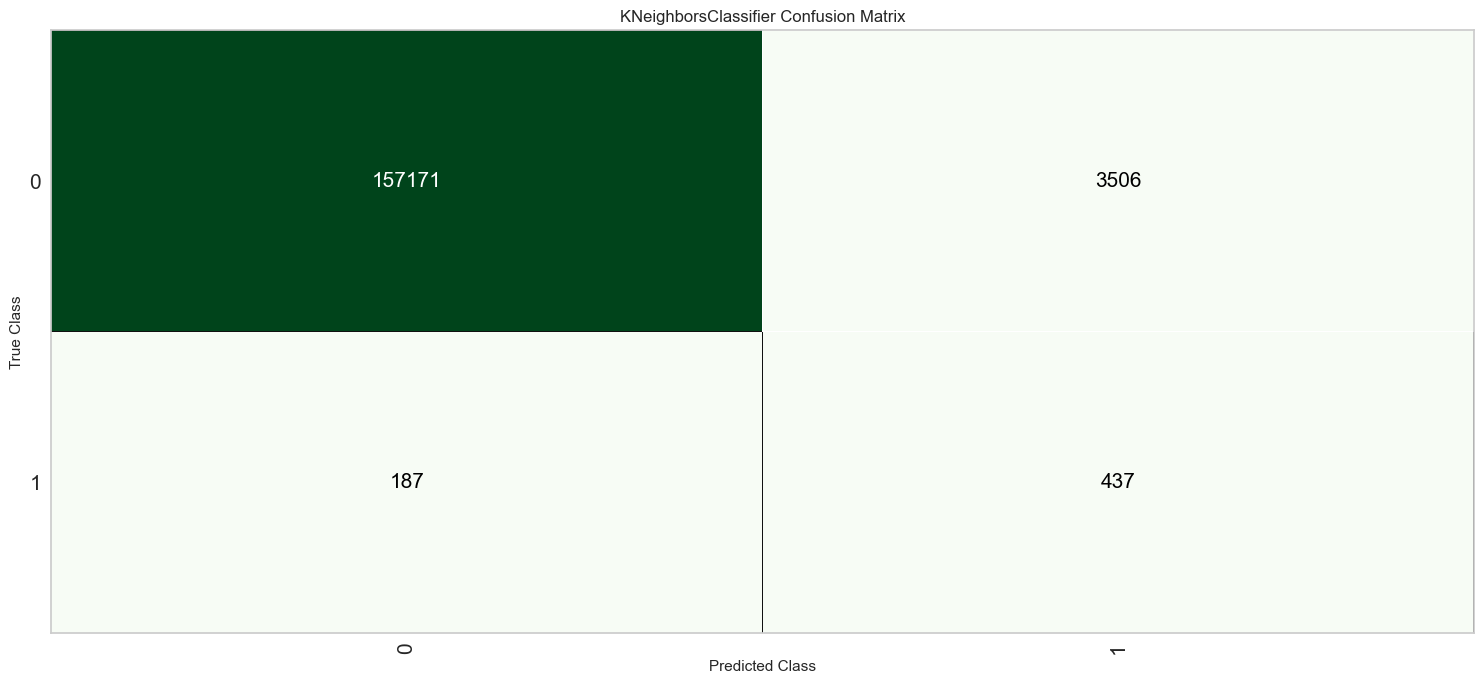

In [112]:
#Confusion Matrix with 30% of the data
#Zero (0) is less risky vs one (1) is high risk
plot_model(knn_model_bal, 'confusion_matrix')

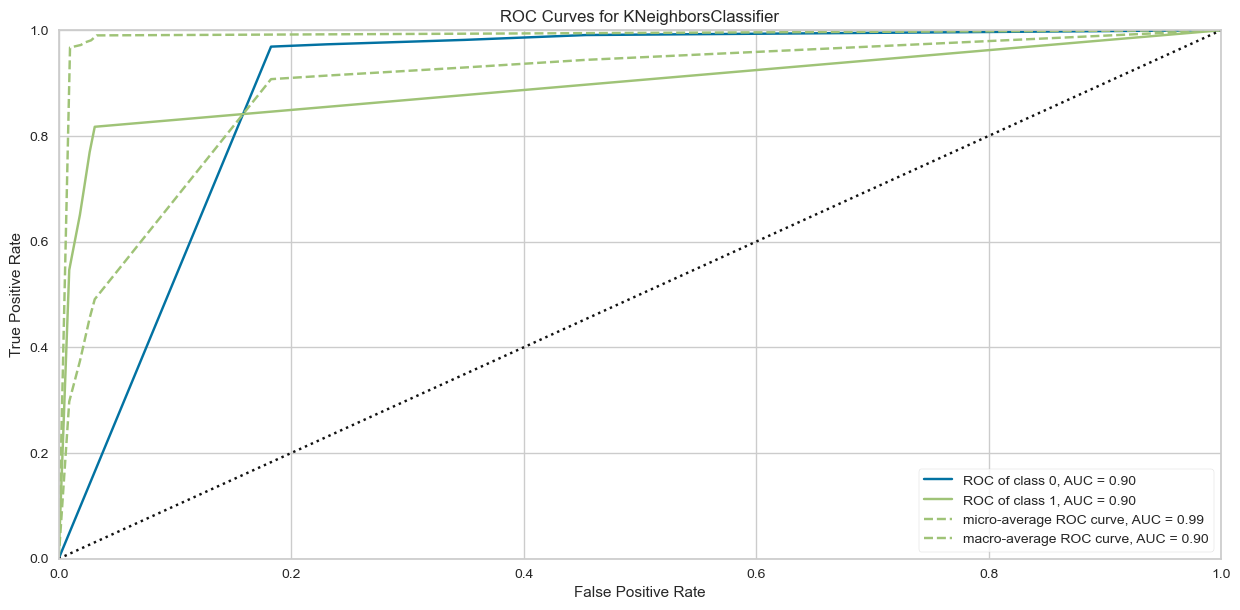

In [113]:
#Plot the knn model using Area under the curve plot
plot_model(knn_model_bal)

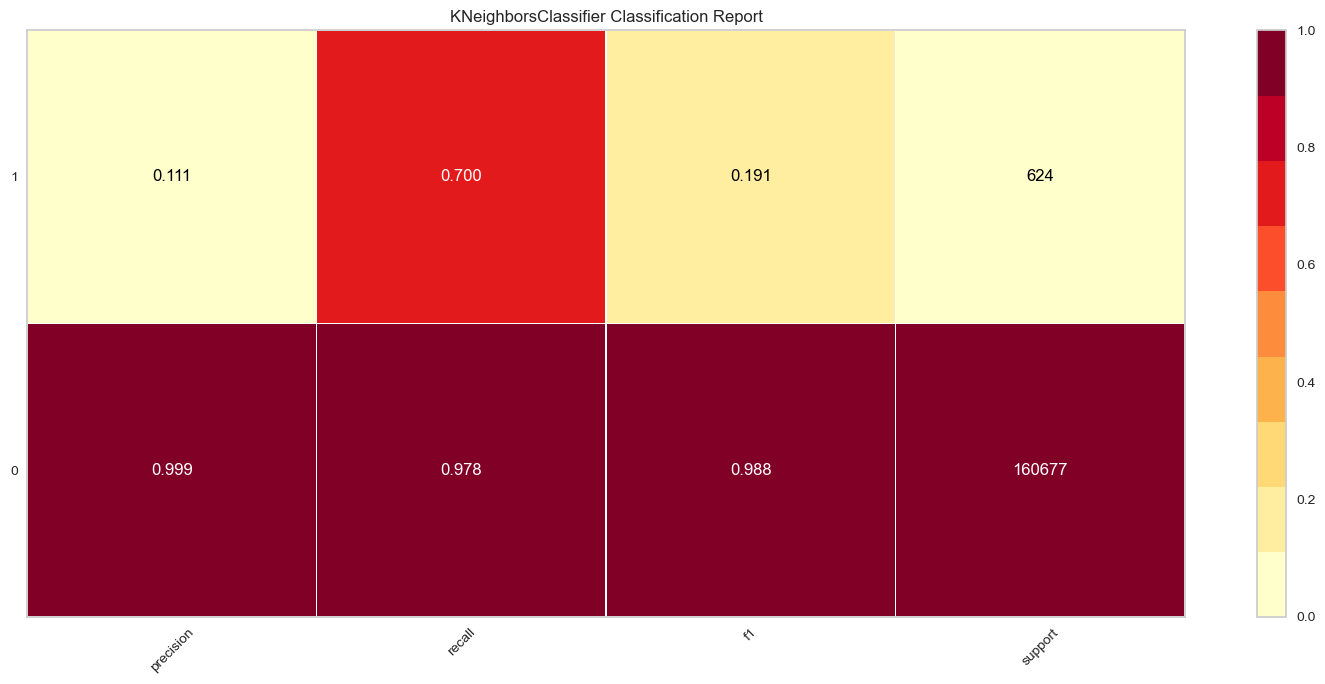

In [114]:
#Plot the KNN Classification Report
#Zero (0) is less risky vs one (1) is high risk
plot_model(knn_model_bal, plot='class_report')

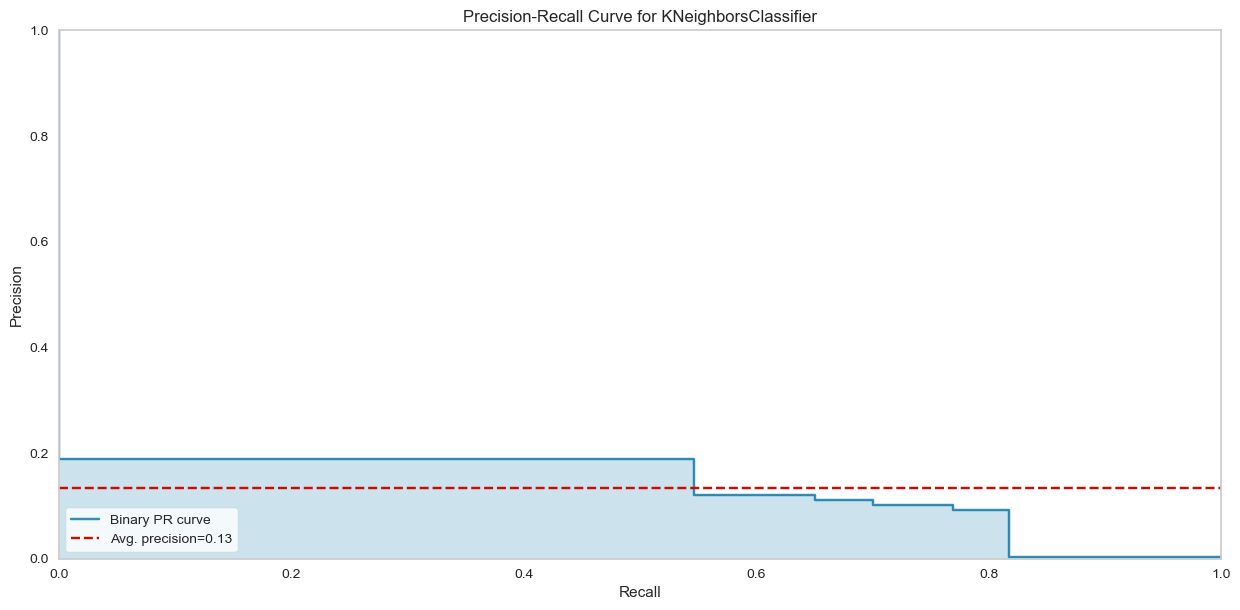

In [115]:
#Plot the important Features Precision Recall Curve
plot_model(knn_model_bal, plot='pr')